### Importing the Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the Dataset

In [33]:
dataset = pd.read_csv("sepsis_data.csv")

In [34]:
dataset.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,1,0
1,97.0,95.0,0.0,98.0,75.33,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,2,0
2,89.0,99.0,0.0,122.0,86.00,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,3,0
3,90.0,95.0,0.0,0.0,0.00,0.0,30.0,0.0,24.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,4,0
4,103.0,88.5,0.0,122.0,91.33,0.0,24.5,0.0,0.0,0.0,...,0.0,0.0,0.0,83.14,0,0.0,0.0,-0.03,5,0


In [35]:
dataset.tail()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
38804,100.5,98.0,37.50,97.0,65.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.33,1,1.0,0.0,-0.05,34,0
38805,92.0,99.0,37.08,103.0,66.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,128.0,55.33,1,1.0,0.0,-0.05,35,0
38806,94.0,99.5,37.39,93.0,63.67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.33,1,1.0,0.0,-0.05,36,0
38807,94.0,99.0,37.28,116.0,72.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.33,1,1.0,0.0,-0.05,37,0
38808,92.0,100.0,37.28,117.0,77.67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,55.33,1,1.0,0.0,-0.05,38,0


In [36]:
dataset.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [37]:

## Check the missing values
null_values = dataset.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

HR                  0.0
Glucose             0.0
Magnesium           0.0
Phosphate           0.0
Potassium           0.0
Bilirubin_total     0.0
TroponinI           0.0
Hct                 0.0
Hgb                 0.0
PTT                 0.0
WBC                 0.0
Fibrinogen          0.0
Platelets           0.0
Age                 0.0
Gender              0.0
Unit1               0.0
Unit2               0.0
HospAdmTime         0.0
ICULOS              0.0
Lactate             0.0
Bilirubin_direct    0.0
O2Sat               0.0
Creatinine          0.0
Temp                0.0
SBP                 0.0
MAP                 0.0
DBP                 0.0
Resp                0.0
EtCO2               0.0
BaseExcess          0.0
HCO3                0.0
FiO2                0.0
pH                  0.0
PaCO2               0.0
SaO2                0.0
AST                 0.0
BUN                 0.0
Alkalinephos        0.0
Calcium             0.0
Chloride            0.0
SepsisLabel         0.0
dtype: float64

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38809 entries, 0 to 38808
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                38809 non-null  float64
 1   O2Sat             38809 non-null  float64
 2   Temp              38809 non-null  float64
 3   SBP               38809 non-null  float64
 4   MAP               38809 non-null  float64
 5   DBP               38809 non-null  float64
 6   Resp              38809 non-null  float64
 7   EtCO2             38809 non-null  float64
 8   BaseExcess        38809 non-null  float64
 9   HCO3              38809 non-null  float64
 10  FiO2              38809 non-null  float64
 11  pH                38809 non-null  float64
 12  PaCO2             38809 non-null  float64
 13  SaO2              38809 non-null  float64
 14  AST               38809 non-null  float64
 15  BUN               38809 non-null  float64
 16  Alkalinephos      38809 non-null  float6

#### Explortaory Data Analysis

In [39]:
dataset['SepsisLabel'].value_counts()

0    37945
1      864
Name: SepsisLabel, dtype: int64

In [40]:
#check the statistics of all columns

dataset.describe(include="all",datetime_is_numeric=True)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.0,38809.000000,38809.000000,...,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000
mean,77.644979,84.406233,12.551628,102.036081,69.932561,30.840501,16.584987,0.0,-0.081592,1.940723,...,0.884586,2.301716,12.870236,61.686347,0.614187,0.253369,0.264629,-49.969477,27.010616,0.022263
std,28.954355,32.984005,17.532129,47.501863,28.396126,31.363911,7.851959,0.0,1.465309,6.674337,...,3.654393,28.709166,56.404094,16.416186,0.486793,0.434946,0.441141,150.960632,27.297357,0.147539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-23.000000,0.000000,...,0.000000,0.000000,0.000000,18.110000,0.000000,0.000000,0.000000,-3269.100000,1.000000,0.000000
25%,69.000000,95.000000,0.000000,97.000000,65.000000,0.000000,14.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,50.930000,0.000000,0.000000,0.000000,-35.820000,11.000000,0.000000
50%,82.000000,97.000000,0.000000,113.000000,74.670000,40.000000,17.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,63.330000,1.000000,0.000000,0.000000,-2.210000,21.000000,0.000000
75%,95.000000,99.000000,36.560000,130.000000,85.000000,59.000000,21.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,74.380000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000
max,181.000000,100.000000,40.500000,234.500000,294.000000,287.000000,67.000000,0.0,24.000000,48.000000,...,123.100000,894.000000,1047.000000,88.980000,1.000000,1.000000,1.000000,14.650000,258.000000,1.000000


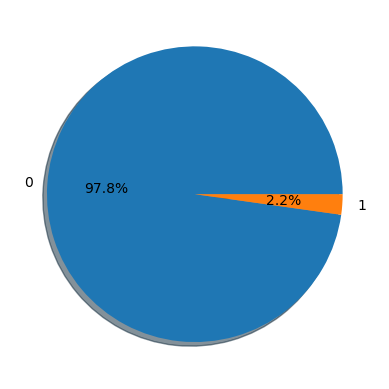

In [41]:
#plotting the above values in a pie-chart
plt.pie(dataset['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()


c:\Users\Hemu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


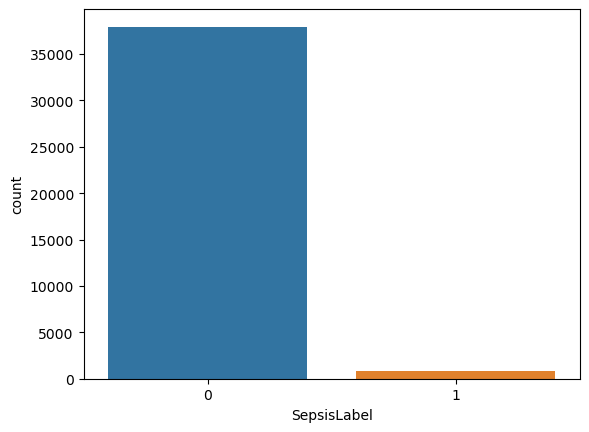

In [42]:
#bargraph
sns.countplot(dataset['SepsisLabel'], label="Count")
plt.show()
#data was inconsistent

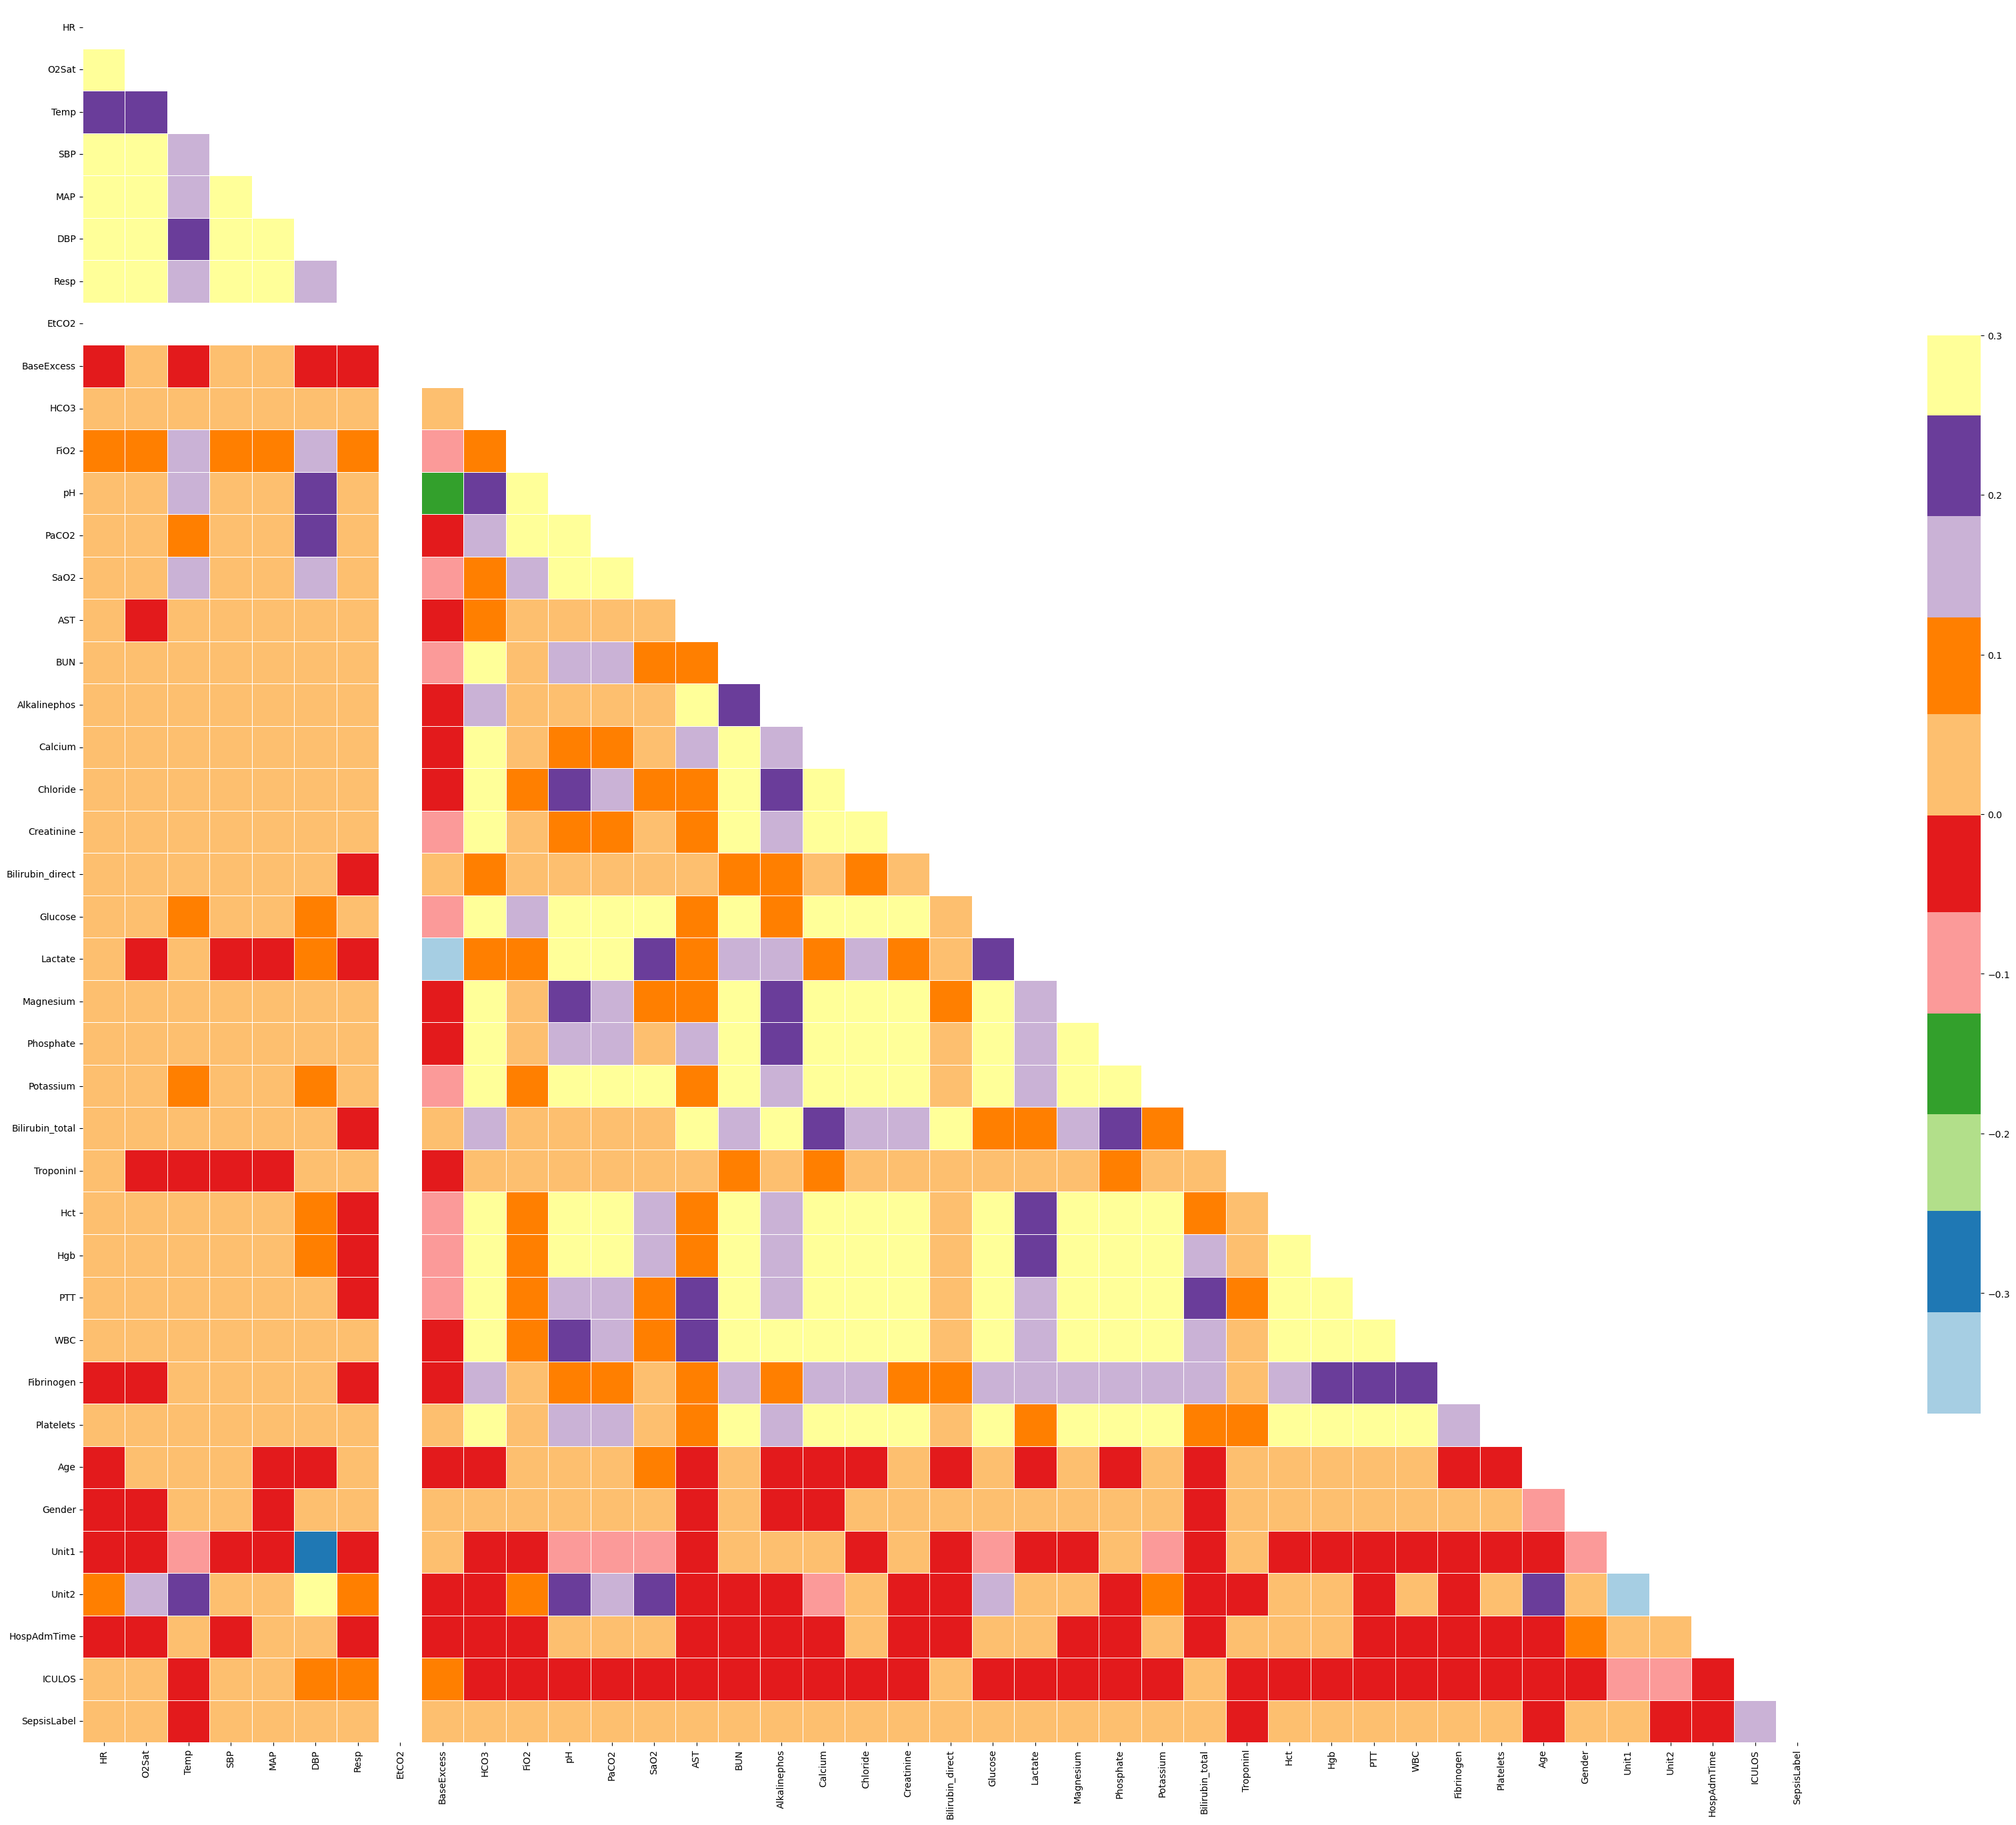

In [43]:
## Check the correlation between the features
def corr_matrix(df):
  corr = df.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(42,42))
  cmap = sns.diverging_palette(220, 10, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap="Paired", vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  
corr_matrix(dataset)

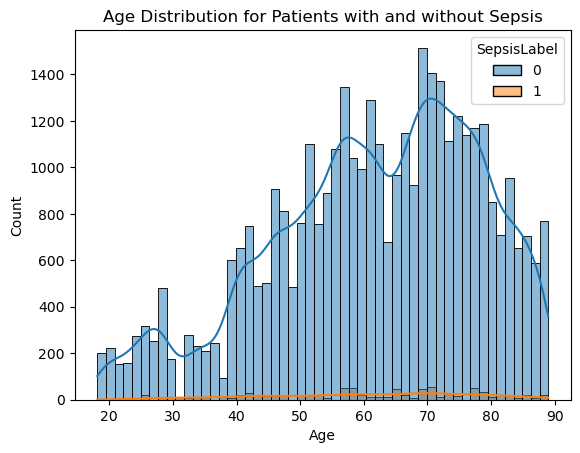

In [44]:
# Visualize the distribution of age for patients with and without sepsis
sns.histplot(data=dataset, x='Age', hue='SepsisLabel', kde=True)
plt.title('Age Distribution for Patients with and without Sepsis')
plt.show()


In [45]:
## Variables distribution graphs
## Continuous features of the dataset
continuous_features = ['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose',
       'Lactate', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC',
       'Platelets', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel',
       'Patient_ID']
## Categorical features of the dataset
categorical_features = ['Gender', 'Unit']



Invalid feature: Hour


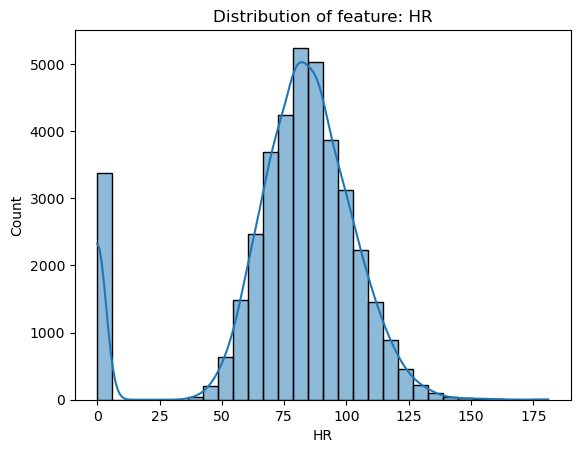

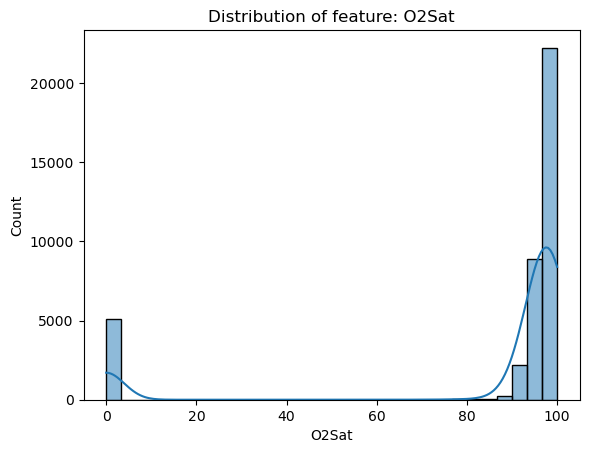

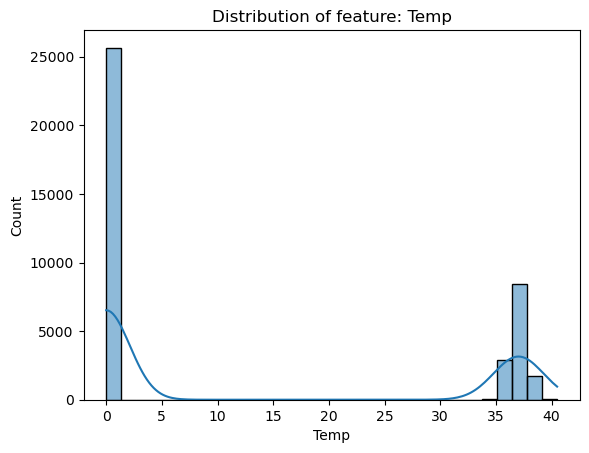

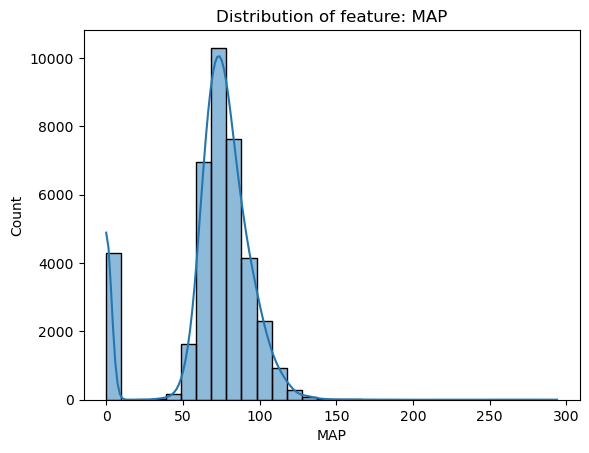

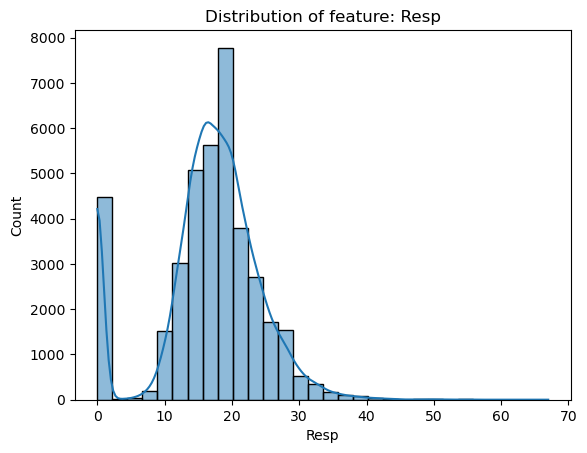

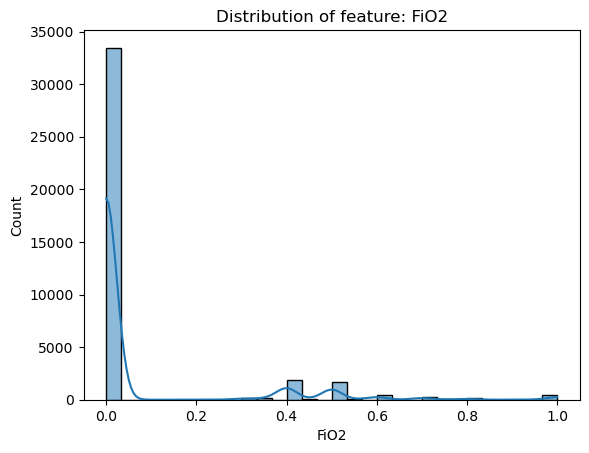

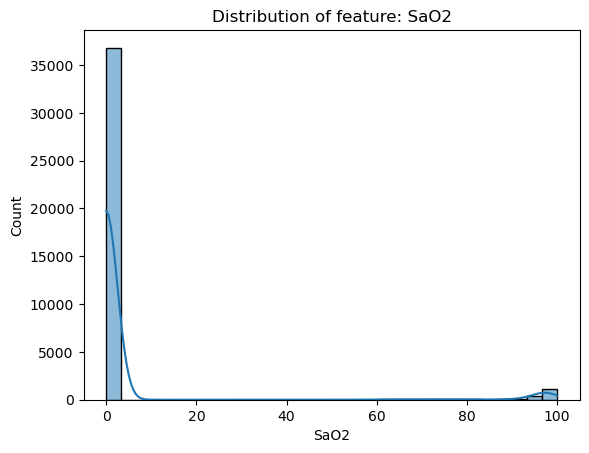

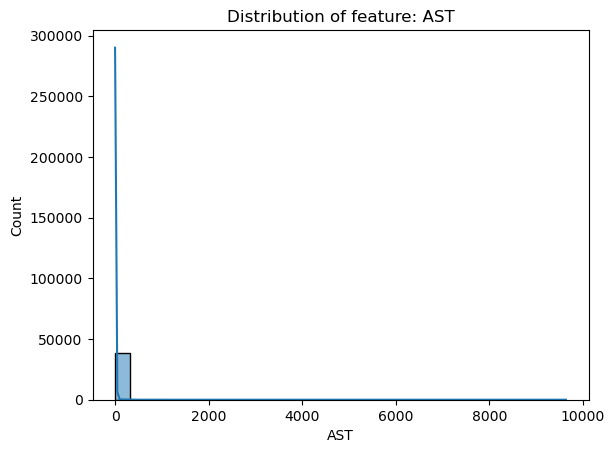

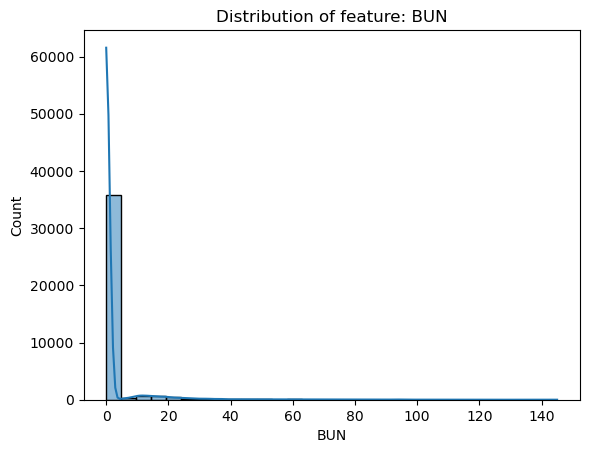

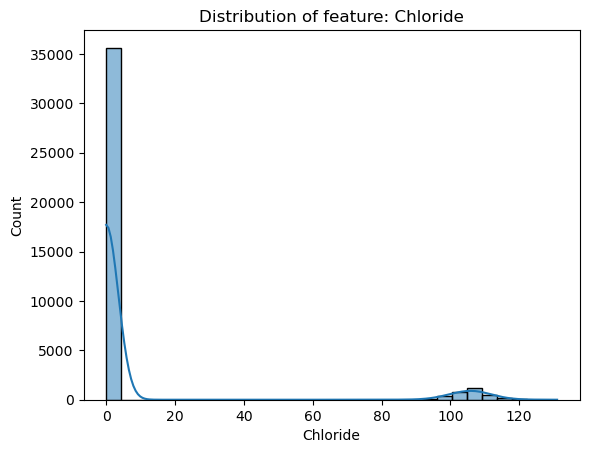

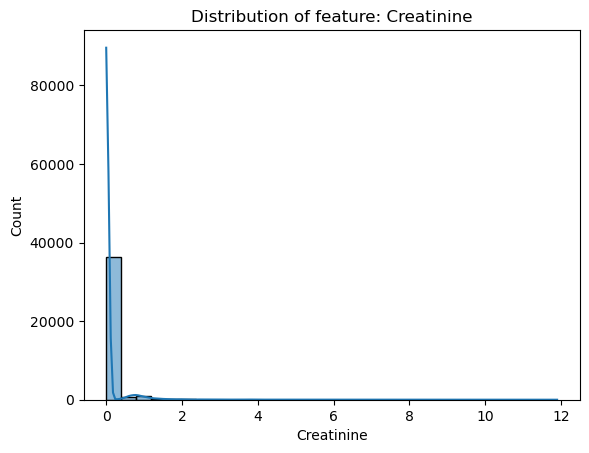

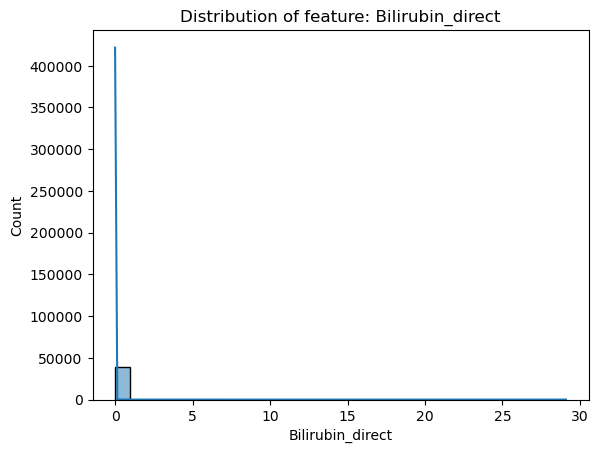

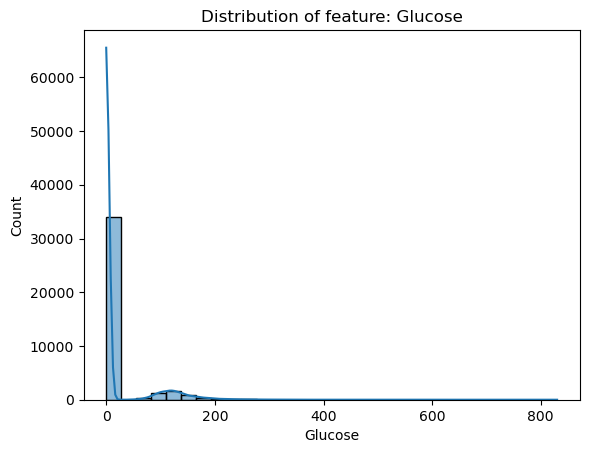

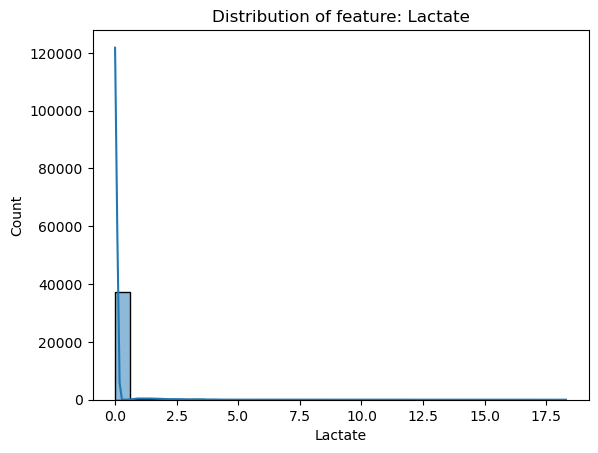

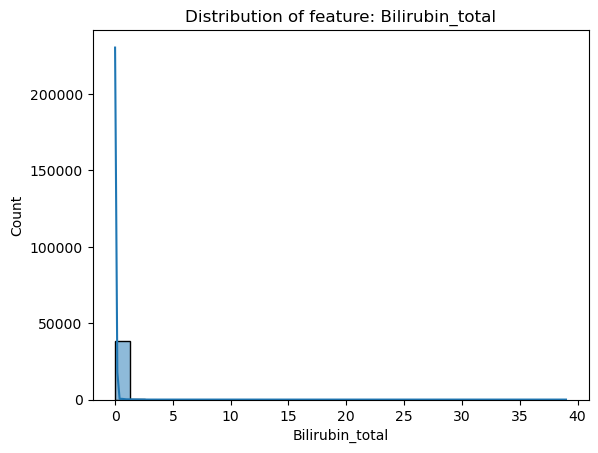

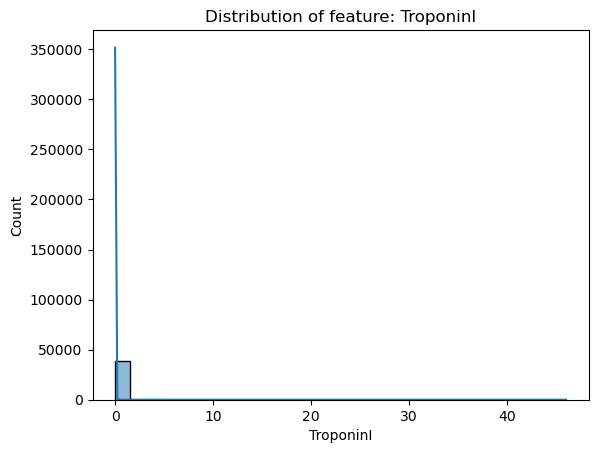

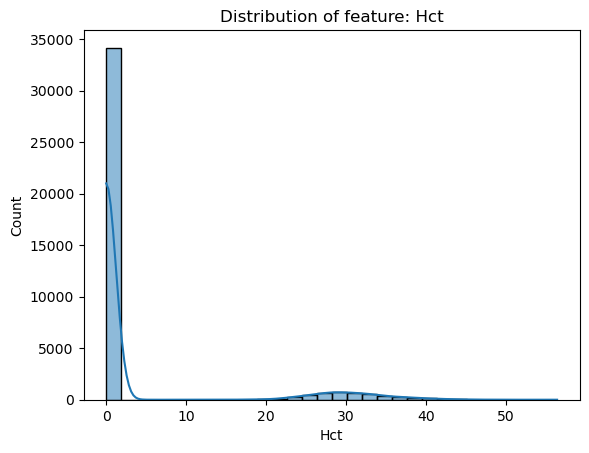

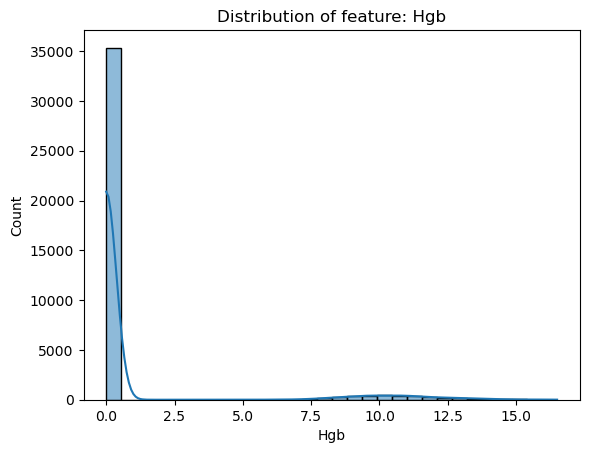

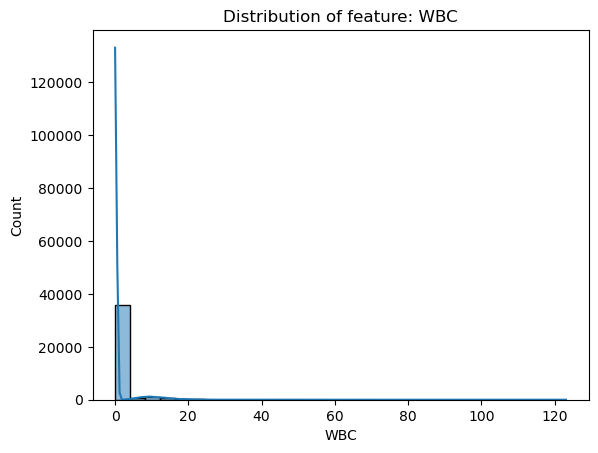

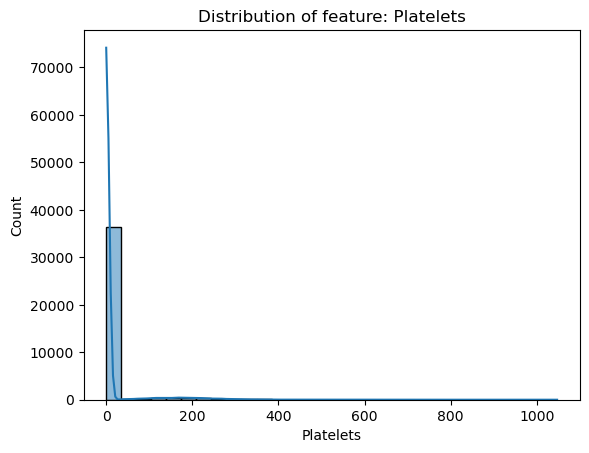

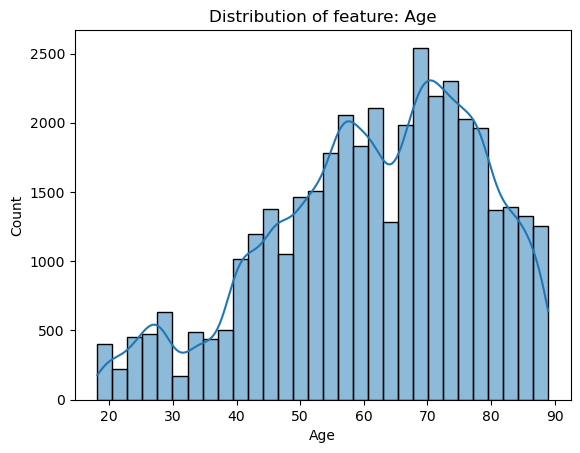

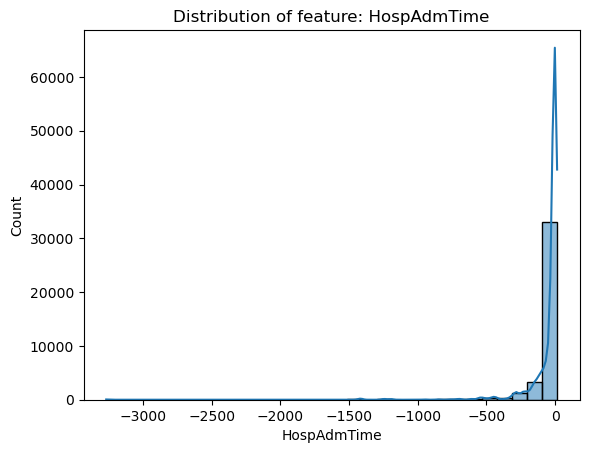

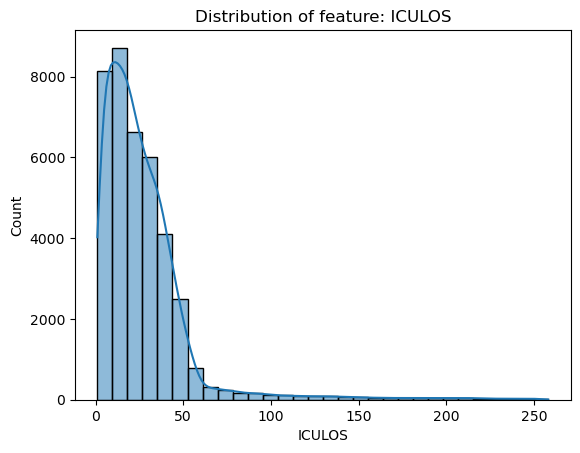

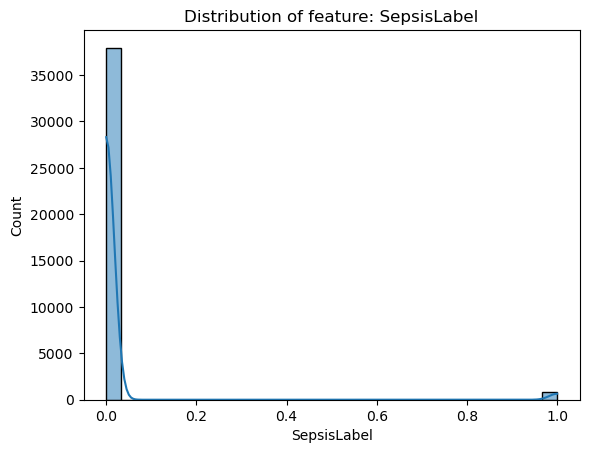

Invalid feature: Patient_ID


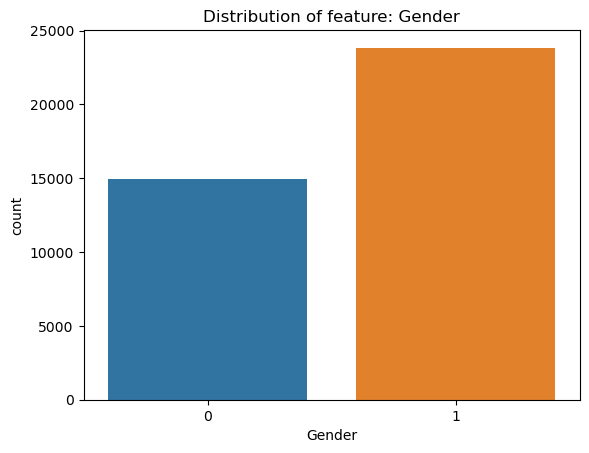

Invalid feature: Unit


In [46]:
# Plot histograms for continuous columns
for feature in continuous_features:
    if feature in dataset.columns:
        sns.histplot(data=dataset, x=feature, kde=True, bins=30)
        plt.title(f'Distribution of feature: {feature}')
        plt.show()
    else:
        print(f"Invalid feature: {feature}")

# Plot bar plots for categorical columns
for feature in categorical_features:
    if feature in dataset.columns:
        sns.countplot(x=feature, data=dataset)
        plt.title(f'Distribution of feature: {feature}')
        plt.show()
    else:
        print(f"Invalid feature: {feature}")

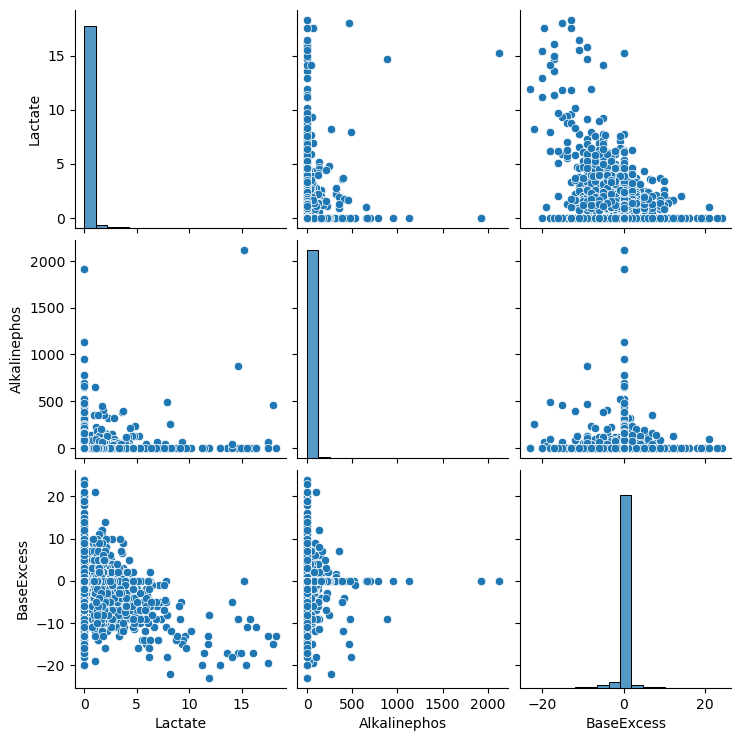

In [47]:
## Pair plot
dfp=dataset.loc[:, ['BaseExcess', 'Lactate','Alkalinephos','SepsisLabel']]
sns_plot=sns.pairplot(dfp,vars=['Lactate','Alkalinephos','BaseExcess'])


#### Re-sample the data

In [48]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37945,    # to match majority class
                                 random_state=123) # reproducible results

In [49]:
#concat
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [50]:
#check the value counts again
df_upsampled.SepsisLabel.value_counts()

0    37945
1    37945
Name: SepsisLabel, dtype: int64

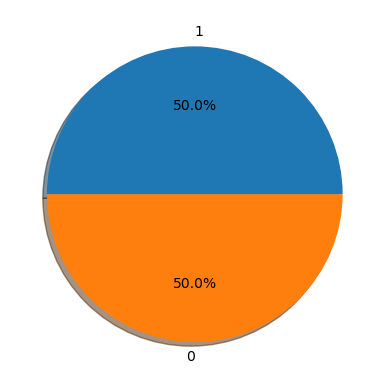

In [51]:
#plot the same graphs as above
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()


c:\Users\Hemu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


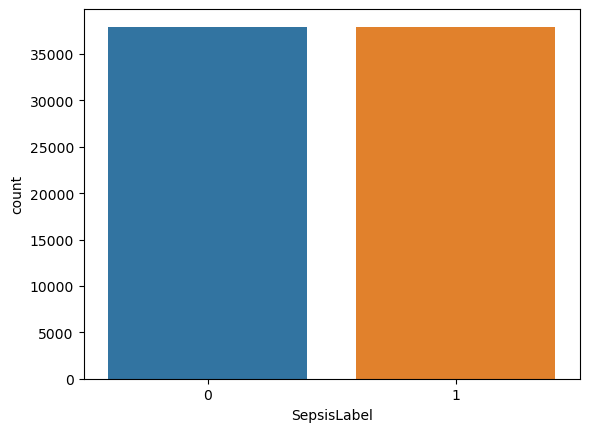

In [52]:
sns.countplot(df_upsampled['SepsisLabel'], label="Count")
plt.show()

#### Split the dataset

In [53]:
X = df_upsampled[df_upsampled.columns[0:40]].values
Y = df_upsampled[df_upsampled.columns[40:]].values

In [54]:
print("sepsis dimensions : {}".format(df_upsampled.shape))

sepsis dimensions : (75890, 41)


In [55]:
#Printing dimensions of sepsis dataset without label column
print("sepsis dimensions without label : {}".format(X.shape))

sepsis dimensions without label : (75890, 40)


In [56]:
#Printing dimensions of sepsis dataset only with label column
print("sepsis dimensions only label : {}".format(Y.shape))

sepsis dimensions only label : (75890, 1)


##### Normalize the labels-LabelEncoder

In [57]:
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

c:\Users\Hemu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


##### Split the data into train and test 

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("Training data dimensions :{}".format(X_train.shape))
print("Testing data dimensions :{}".format(X_test.shape))

Training data dimensions :(60712, 40)
Testing data dimensions :(15178, 40)


#### Training the ML model

In [59]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Assume you have preprocessed data and split into X_train, X_test, Y_train, Y_test

# Define classifiers
classifiers = [
    MLPClassifier(
        activation='tanh',
        solver='lbfgs',
        early_stopping=False,
        hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
        random_state=1,
        batch_size='auto',
        max_iter=13000,
        learning_rate_init=1e-5,
        tol=1e-4,
    ),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

# Logging for Visual Comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

# Train and evaluate classifiers
for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions_proba = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions_proba)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
print("Training and evaluation completed.")
print(log)


KeyboardInterrupt: 

### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import pandas as pd

# Define classifiers
classifiers = [
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    MLPClassifier(
        activation='tanh',
        solver='lbfgs',
        early_stopping=False,
        hidden_layer_sizes=(40, 10, 10, 10, 10, 2),
        random_state=1,
        batch_size='auto',
        max_iter=13000,
        learning_rate_init=1e-5,
        tol=1e-4,
    )
]

# Logging for Visual Comparison
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

# Display the results
print(log)


RandomForestClassifier
****Results****
Accuracy: 99.9473%
Log Loss: 0.009680222485989454
ExtraTreesClassifier
****Results****
Accuracy: 99.9671%
Log Loss: 0.008263208606876725
BaggingClassifier
****Results****
Accuracy: 99.8089%
Log Loss: 0.01293816294965136
GradientBoostingClassifier
****Results****
Accuracy: 91.3954%
Log Loss: 0.31111460107876754
AdaBoostClassifier
****Results****
Accuracy: 79.8261%
Log Loss: 0.6731792683873682


c:\Users\Hemu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
Accuracy: 69.1857%
Log Loss: 0.585928372477039
GaussianNB
****Results****
Accuracy: 57.7678%
Log Loss: 2.120984212868764
DecisionTreeClassifier
****Results****
Accuracy: 99.7035%
Log Loss: 0.10240116865008536
MLPClassifier
****Results****
Accuracy: 94.8544%
Log Loss: 0.17861330481954057
                   Classifier   Accuracy  Log Loss
0      RandomForestClassifier  99.947292  0.009680
0        ExtraTreesClassifier  99.967058  0.008263
0           BaggingClassifier  99.808934  0.012938
0  GradientBoostingClassifier  91.395441  0.311115
0          AdaBoostClassifier  79.826064  0.673179
0          LogisticRegression  69.185663  0.585928
0                  GaussianNB  57.767822  2.120984
0      DecisionTreeClassifier  99.703518  0.102401
0               MLPClassifier  94.854395  0.178613


c:\Users\Hemu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
fghghku

NameError: name 'fghghku' is not defined

RandomForestClassifier
****Results****
Accuracy: 99.9407%


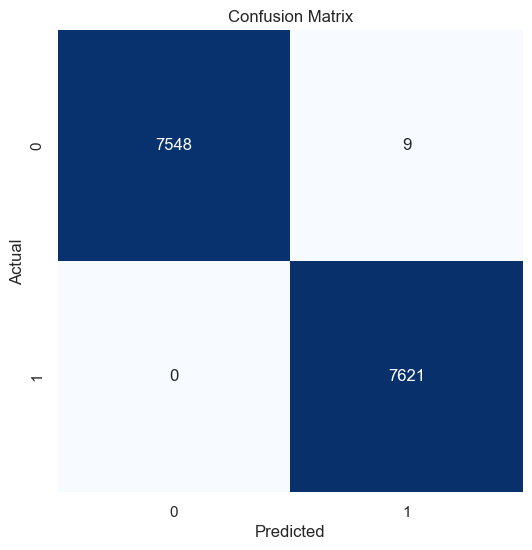

Log Loss: 0.009742455679373844
ExtraTreesClassifier
****Results****
Accuracy: 99.9605%


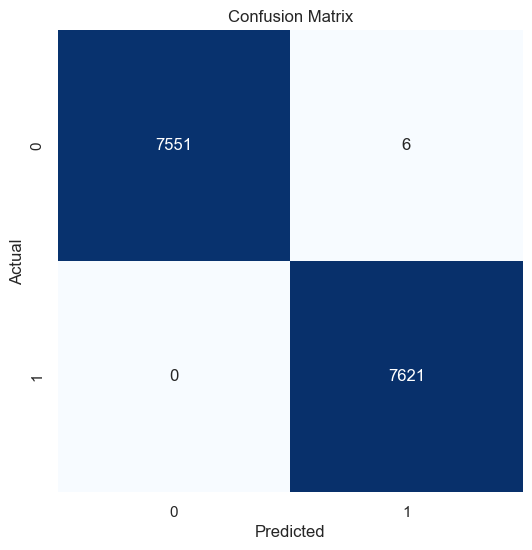

Log Loss: 0.008289581549690712
BaggingClassifier
****Results****
Accuracy: 99.8485%


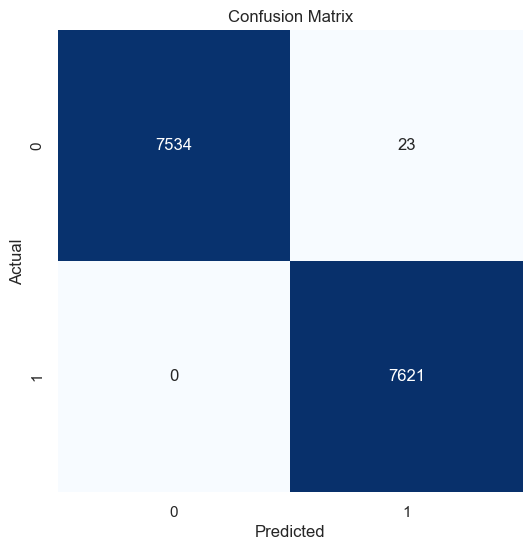

Log Loss: 0.014901362926353736
GradientBoostingClassifier
****Results****
Accuracy: 91.3954%


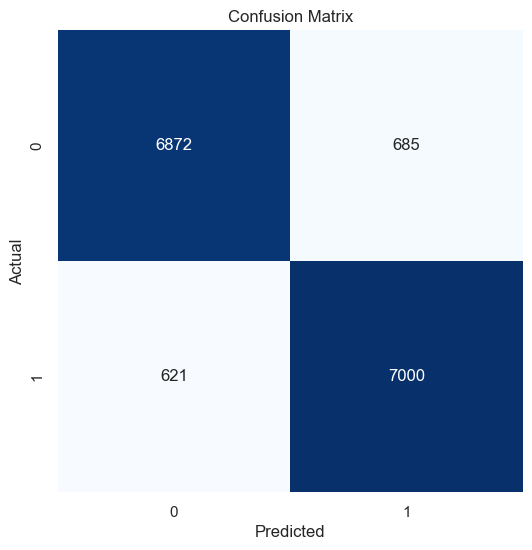

Log Loss: 0.3111223602886631
AdaBoostClassifier
****Results****
Accuracy: 79.8261%


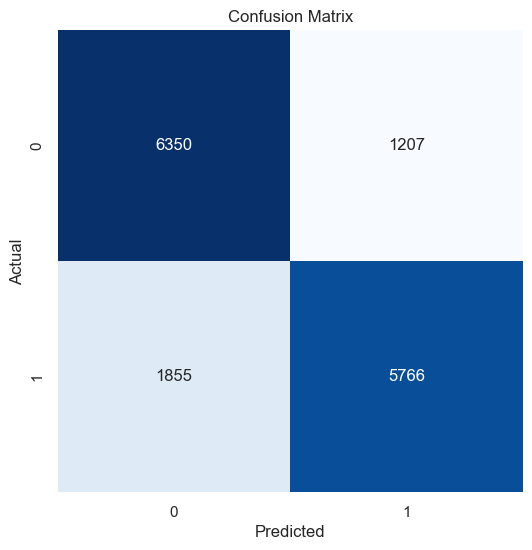

Log Loss: 0.6731792683873681
LogisticRegression
****Results****
Accuracy: 69.1857%


c:\Users\Hemu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


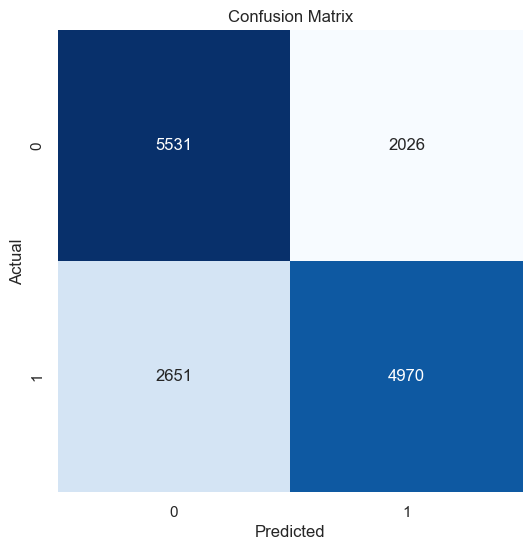

Log Loss: 0.585928372477039
GaussianNB
****Results****
Accuracy: 57.7678%


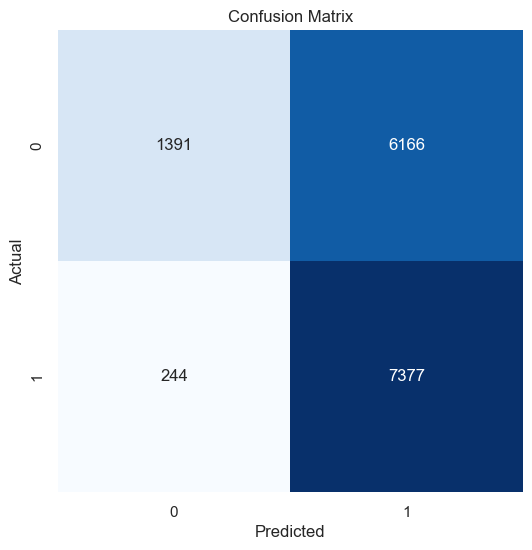

Log Loss: 2.120984212868764
DecisionTreeClassifier
****Results****
Accuracy: 99.7101%


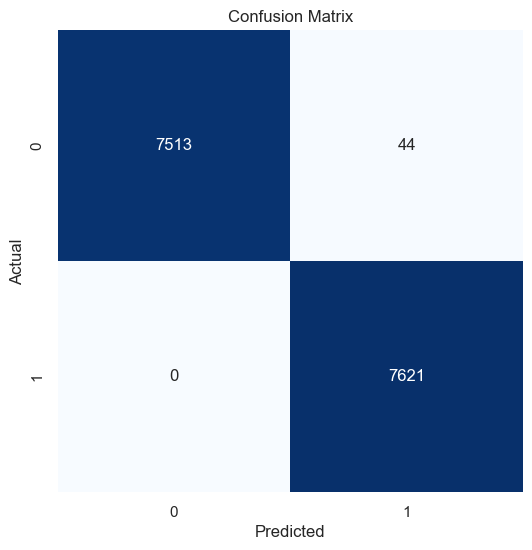

Log Loss: 0.10012558712452792
MLPClassifier
****Results****
Accuracy: 94.8544%


c:\Users\Hemu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


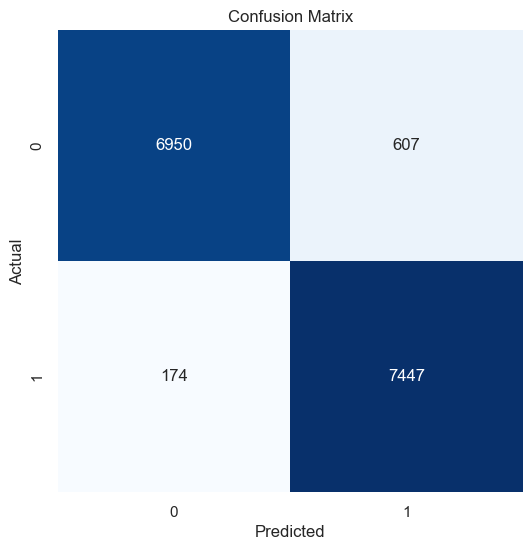

Log Loss: 0.17861330481954057
                   Classifier   Accuracy  Log Loss
0      RandomForestClassifier  99.967058  0.009691
0        ExtraTreesClassifier  99.980235  0.008382
0           BaggingClassifier  99.808934  0.017143
0  GradientBoostingClassifier  91.395441  0.311124
0          AdaBoostClassifier  79.826064  0.673179
0          LogisticRegression  69.185663  0.585928
0                  GaussianNB  57.767822  2.120984
0      DecisionTreeClassifier  99.736461  0.091023
0               MLPClassifier  94.854395  0.178613
0      RandomForestClassifier  99.940704  0.009742
0        ExtraTreesClassifier  99.960469  0.008290
0           BaggingClassifier  99.848465  0.014901
0  GradientBoostingClassifier  91.395441  0.311122
0          AdaBoostClassifier  79.826064  0.673179
0          LogisticRegression  69.185663  0.585928
0                  GaussianNB  57.767822  2.120984
0      DecisionTreeClassifier  99.710107  0.100126
0               MLPClassifier  94.854395  0.178613


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... Previous code ...

for clf in classifiers:
    clf.fit(X_train, Y_train)
    name = clf.__class__.__name__

    print("=" * 30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(Y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    # Confusion Matrix
    cm = confusion_matrix(Y_test, train_predictions)

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(Y_test, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("=" * 30)

# Display the results
print(log)


In [ ]:
# Choose the best classifier based on highest accuracy
best_classifier = log.loc[log['Accuracy'].idxmax()]['Classifier']
print(best_classifier)



0        RandomForestClassifier
0          ExtraTreesClassifier
0             BaggingClassifier
0    GradientBoostingClassifier
0            AdaBoostClassifier
0            LogisticRegression
0                    GaussianNB
0        DecisionTreeClassifier
0                 MLPClassifier
Name: Classifier, dtype: object


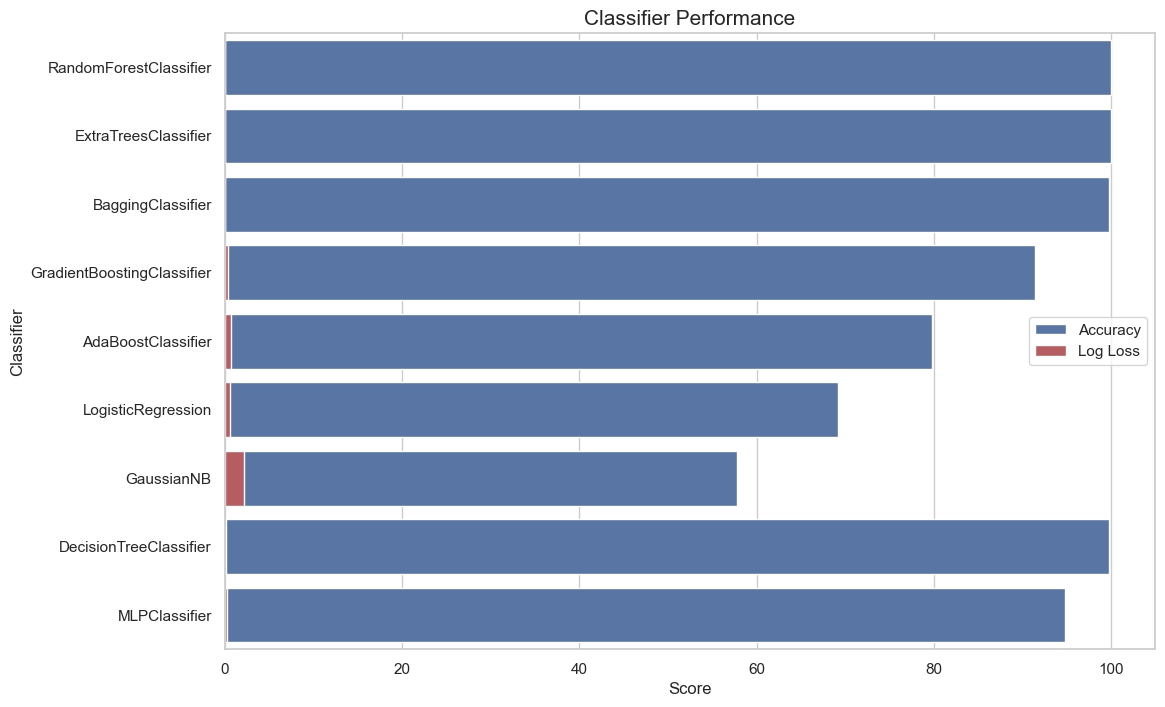

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plotting the accuracy
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b', label='Accuracy')

# Plotting the log loss
sns.barplot(x='Log Loss', y='Classifier', data=log, color='r', label='Log Loss')

plt.xlabel('Score', fontsize=12)
plt.ylabel('Classifier', fontsize=12)
plt.title('Classifier Performance', fontsize=15)
plt.legend()
plt.show()

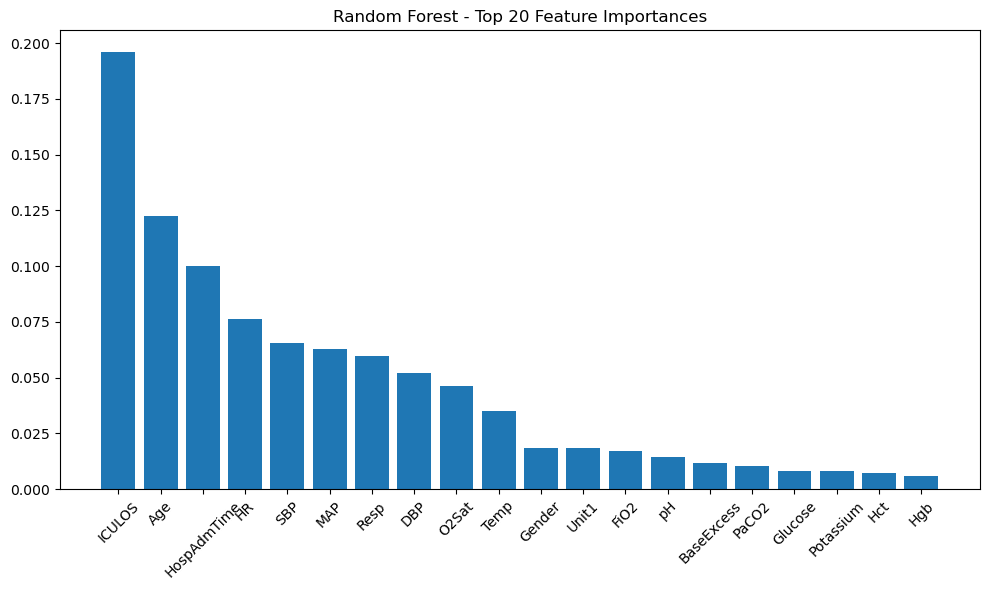

In [67]:
#feature importance
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your features and y is your target variable
X = dataset.drop('SepsisLabel', axis=1)  # Dropping the target variable
y = dataset['SepsisLabel']

# Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances from the model
feature_importances = clf.feature_importances_

# Get feature names (assuming X has column names)
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the 20 most important features
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Top 20 Feature Importances")
plt.bar(range(20), feature_importances[indices][:20], align="center")
plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=45)
plt.tight_layout()
plt.show()


In [68]:
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Get the names of the top 5 columns (adjust the number as needed)
top_feature_names = [feature_names[i] for i in indices[:5]]

# Print the names of the top columns
print("Top 5 Feature Names:")
for name in top_feature_names:
    print(name)


Top 5 Feature Names:
ICULOS
Age
HospAdmTime
HR
SBP


In [60]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create instances of the classifiers
random_forest = RandomForestClassifier()
extra_trees = ExtraTreesClassifier()
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)  # Example base estimator
decision_tree = DecisionTreeClassifier()

# Create a VotingClassifier with 'soft' voting
# Soft voting returns the class label as the output that has the highest probability for majority class
classifiers = [
    ('Random Forest', random_forest),
    ('Extra Trees', extra_trees),
    ('Bagging', bagging),
    ('Decision Tree', decision_tree)
]

voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, Y_train)

# Predict the test data
result = voting_classifier.predict(X_test)

# Count the majority vote
majority_result = sum(result) >= (len(result) / 2)

# The final result: 0 for 'No Sepsis' and 1 for 'Sepsis'
final_result = 1 if majority_result else 0

print( final_result)


1


In [82]:
import joblib
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load or create your dataset
# You should replace this with your actual dataset
X_train = np.random.rand(50, 40)  # 50 samples with 40 features
Y_train = np.random.randint(2, size=50)  # Simulated labels (0 or 1)

# Assuming X_train and X_test are NumPy arrays with 40 columns
# Use integer indexing to select the top 5 columns
X_train_selected = X_train[:, [39, 34,38, 0, 3]]  # Replace with the correct column indices
# X_test_selected = X_test[:, [0, 1, 2, 3, 4]]  # If you have a test dataset

# Create instances of the classifiers
random_forest = RandomForestClassifier()
extra_trees = ExtraTreesClassifier()
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
decision_tree = DecisionTreeClassifier()

# Create a VotingClassifier with 'soft' voting
classifiers = [
    ('Random Forest', random_forest),
    ('Extra Trees', extra_trees),
    ('Bagging', bagging),
    ('Decision Tree', decision_tree)
]

voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train_selected, Y_train)

# Save the model to a .pkl file
joblib.dump(voting_classifier, 'voting_classifier_sepsis.pkl')

#




['voting_classifier_sepsis.pkl']

In [64]:

# Load the VotingClassifier model
voting_classifier = joblib.load('voting_classifier.pkl')

In [80]:
column_name = "SBP"

# Get the index (column number) for the specified column name
column_index = dataset.columns.get_loc(column_name)
column_index

3

['sepsis_classifier.pkl']